Unique values of all features:

age: continuous.

workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: continuous.

capital-loss: continuous.

hours-per-week: continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

**Часть 1**

In [0]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')

In [0]:
data = pd.read_csv('adult.data.csv')
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


**1. How many men and women (sex feature) are represented in this dataset?**

In [0]:
data['sex'].value_counts()

Male      21790
Female    10771
Name: sex, dtype: int64

**2. What is the average age (age feature) of women?**

In [0]:
data.loc[data['sex'] == 'Female', 'age'].mean()

36.85823043357163

**3. What is the proportion of German citizens (native-country feature)?**

In [0]:
float((data['native-country'] == 'Germany').sum()) / data.shape[0]

0.004207487485028101

**4-5. What are mean value and standard deviation of the age of those who recieve more than 50K per year (salary feature) and those who receive less than 50K per year?**

In [0]:
ages1 = data.loc[data['salary'] == '>50K', 'age']
ages2 = data.loc[data['salary'] == '<=50K', 'age']
print("The average age of the rich: {0} +- {1} years, poor - {2} +- {3} years.".format(
    round(ages1.mean()), round(ages1.std(), 1),
    round(ages2.mean()), round(ages2.std(), 1)))

The average age of the rich: 44 +- 10.5 years, poor - 37 +- 14.0 years.


**6. Is it true that people who receive more than 50k have at least high school education? (education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters or Doctorate feature)**

In [0]:
data.loc[data['salary'] == '>50K', 'education'].unique() # No

array(['HS-grad', 'Masters', 'Bachelors', 'Some-college', 'Assoc-voc',
       'Doctorate', 'Prof-school', 'Assoc-acdm', '7th-8th', '12th',
       '10th', '11th', '9th', '5th-6th', '1st-4th'], dtype=object)

**7. Display statistics of age for each race (race feature) and each gender. Use groupby() and describe(). Find the maximum age of men of Amer-Indian-Eskimo race.**

In [0]:
for (race, sex), sub_df in data.groupby(['race', 'sex']):
    print("Race: {0}, sex: {1}".format(race, sex))
    print(sub_df['age'].describe())

Race: Amer-Indian-Eskimo, sex: Female
count    119.000000
mean      37.117647
std       13.114991
min       17.000000
25%       27.000000
50%       36.000000
75%       46.000000
max       80.000000
Name: age, dtype: float64
Race: Amer-Indian-Eskimo, sex: Male
count    192.000000
mean      37.208333
std       12.049563
min       17.000000
25%       28.000000
50%       35.000000
75%       45.000000
max       82.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Female
count    346.000000
mean      35.089595
std       12.300845
min       17.000000
25%       25.000000
50%       33.000000
75%       43.750000
max       75.000000
Name: age, dtype: float64
Race: Asian-Pac-Islander, sex: Male
count    693.000000
mean      39.073593
std       12.883944
min       18.000000
25%       29.000000
50%       37.000000
75%       46.000000
max       90.000000
Name: age, dtype: float64
Race: Black, sex: Female
count    1555.000000
mean       37.854019
std        12.637197
min        17.000000

**8. Among whom the proportion of those who earn a lot(>50K) is more: among married or single men (marital-status feature)? Consider married those who have a marital-status starting with Married (Married-civ-spouse, Married-spouse-absent or Married-AF-spouse), the rest are considered bachelors.**

In [0]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].isin(['Never-married', 
                                   'Separated', 
                                   'Divorced',
                                   'Widowed'])), 'salary'].value_counts()

<=50K    7552
>50K      697
Name: salary, dtype: int64

In [0]:
data.loc[(data['sex'] == 'Male') &
     (data['marital-status'].str.startswith('Married')), 'salary'].value_counts()

<=50K    7576
>50K     5965
Name: salary, dtype: int64

In [0]:
data['marital-status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

**9. What is the maximum number of hours a person works per week (hours-per-week feature)? How many people work such a number of hours and what is the percentage of those who earn a lot among them?**

In [0]:
max_load = data['hours-per-week'].max()
print("Max time - {0} hours./week.".format(max_load))

num_workaholics = data[data['hours-per-week'] == max_load].shape[0]
print("Total number of such hard workers {0}".format(num_workaholics))

rich_share = float(data[(data['hours-per-week'] == max_load)
                 & (data['salary'] == '>50K')].shape[0]) / num_workaholics
print("Percentage of rich among them {0}%".format(int(100 * rich_share)))

Max time - 99 hours./week.
Total number of such hard workers 85
Percentage of rich among them 29%


**10. Count the average time of work (hours-per-week) those who earning a little and a lot (salary) for each country (native-country).**

In [0]:
for (country, salary), sub_df in data.groupby(['native-country', 'salary']):
    print(country, salary, round(sub_df['hours-per-week'].mean(), 2))

? <=50K 40.16
? >50K 45.55
Cambodia <=50K 41.42
Cambodia >50K 40.0
Canada <=50K 37.91
Canada >50K 45.64
China <=50K 37.38
China >50K 38.9
Columbia <=50K 38.68
Columbia >50K 50.0
Cuba <=50K 37.99
Cuba >50K 42.44
Dominican-Republic <=50K 42.34
Dominican-Republic >50K 47.0
Ecuador <=50K 38.04
Ecuador >50K 48.75
El-Salvador <=50K 36.03
El-Salvador >50K 45.0
England <=50K 40.48
England >50K 44.53
France <=50K 41.06
France >50K 50.75
Germany <=50K 39.14
Germany >50K 44.98
Greece <=50K 41.81
Greece >50K 50.62
Guatemala <=50K 39.36
Guatemala >50K 36.67
Haiti <=50K 36.33
Haiti >50K 42.75
Holand-Netherlands <=50K 40.0
Honduras <=50K 34.33
Honduras >50K 60.0
Hong <=50K 39.14
Hong >50K 45.0
Hungary <=50K 31.3
Hungary >50K 50.0
India <=50K 38.23
India >50K 46.48
Iran <=50K 41.44
Iran >50K 47.5
Ireland <=50K 40.95
Ireland >50K 48.0
Italy <=50K 39.62
Italy >50K 45.4
Jamaica <=50K 38.24
Jamaica >50K 41.1
Japan <=50K 41.0
Japan >50K 47.96
Laos <=50K 40.38
Laos >50K 40.0
Mexico <=50K 40.0
Mexico >50K 46

**2 часть**

In [0]:
user_usage = pd.read_csv('user_usage.csv')
user_device = pd.read_csv('user_device.csv')
devices = pd.read_csv('android_devices.csv')

In [0]:
user_usage.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
0,21.97,4.82,1557.33,22787
1,1710.08,136.88,7267.55,22788
2,1710.08,136.88,7267.55,22789
3,94.46,35.17,519.12,22790
4,71.59,79.26,1557.33,22792


In [0]:
user_device.head()

,use_id,user_id,platform,platform_version,device,use_type_id
0,22782,26980,ios,10.2,"iPhone7,2",2
1,22783,29628,android,6.0,Nexus 5,3
2,22784,28473,android,5.1,SM-G903F,1
3,22785,15200,ios,10.2,"iPhone7,2",3
4,22786,28239,android,6.0,ONE E1003,1


In [0]:
devices.head(10)

,Retail Branding,Marketing Name,Device,Model
0,NaN,NaN,AD681H,Smartfren Andromax AD681H
1,NaN,NaN,FJL21,FJL21
2,NaN,NaN,T31,Panasonic T31
3,NaN,NaN,hws7721g,MediaPad 7 Youth 2
4,3Q,OC1020A,OC1020A,OC1020A
5,7Eleven,IN265,IN265,IN265
6,A.O.I. ELECTRONICS FACTORY,A.O.I.,TR10CS1_11,TR10CS1
7,AG Mobile,AG BOOST 2,BOOST2,E4010
8,AG Mobile,AG Flair,AG_Flair,Flair
9,AG Mobile,AG Go Tab Access 2,AG_Go_Tab_Access_2,AG_Go_Tab_Access_2


**inner join**

In [0]:
result = pd.merge(user_usage,
                  user_device[['use_id', 'platform', 'device']],
                  on='use_id')
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [0]:
print("user_usage dimensions: {}".format(user_usage.shape))
print("user_device dimensions: {}".format(user_device[['use_id', 'platform', 'device']].shape))
print("result dimensions: {}".format(result.shape))

user_usage dimensions: (240, 4)
user_device dimensions: (272, 3)
result dimensions: (159, 6)


In [0]:
user_usage['use_id'].isin(user_device['use_id']).value_counts()

True     159
False     81
Name: use_id, dtype: int64

**left join**

In [0]:
result = pd.merge(user_usage,
                  user_device[['use_id', 'platform', 'device']],
                  on='use_id',
                  how='left')
print("user_usage dimensions: {}".format(user_usage.shape))
print("result dimensions: {}".format(result.shape))
print("there are {} missing values in the result".format(result['device'].isnull().sum()))

user_usage dimensions: (240, 4)
result dimensions: (240, 6)
there are 81 missing values in the result


In [0]:
result.head()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
2,1710.08,136.88,7267.55,22789,android,SM-G930F
3,94.46,35.17,519.12,22790,android,D2303
4,71.59,79.26,1557.33,22792,android,SM-G361F


In [0]:
result.tail()

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
235,260.66,68.44,896.96,25008,NaN,NaN
236,97.12,36.50,2815.00,25040,NaN,NaN
237,355.93,12.37,6828.09,25046,NaN,NaN
238,632.06,120.46,1453.16,25058,NaN,NaN
239,488.70,906.92,3089.85,25220,NaN,NaN


**right join**

In [0]:
result = pd.merge(user_usage,
                  user_device[['use_id', 'platform', 'device']],
                  on='use_id',
                  how='right')
print("user_device dimensions: {}".format(user_device.shape))
print("result dimensions: {}".format(result.shape))
print("there are {} missing values in the 'monthly_mb' column in the result".format(result['monthly_mb'].isnull().sum()))
print("there are {} missing values in the 'platform' column in the result".format(result['platform'].isnull().sum()))

user_device dimensions: (272, 6)
result dimensions: (272, 6)
there are 113 missing values in the 'monthly_mb' column in the result
there are 0 missing values in the 'platform' column in the result


**Full outer join**

In [0]:
print("There are {} unique values of use_id in our dataframes".format(
    pd.concat([user_usage['use_id'], user_device['use_id']]).unique().shape[0]))
result = pd.merge(user_usage,
                  user_device[['use_id', 'platform', 'device']],
                  on='use_id',
                  how='outer')
print("Outer merge has {} rows".format(result.shape))
print("There are {} rows with no missing values".format(
    (result.apply(lambda x: x.isnull().sum(), axis = 1) == 0).sum()))

There are 353 unique values of use_id in our dataframes
Outer merge has (353, 6) rows
There are 159 rows with no missing values


**Использование индикатора**

In [0]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id', 
                 how='outer', 
                 indicator=True)

In [0]:
result.iloc[[0, 1, 200, 201, 350, 351]]

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id,platform,device
0,21.97,4.82,1557.33,22787,android,GT-I9505
1,1710.08,136.88,7267.55,22788,android,SM-G930F
200,28.79,29.42,3114.67,23988,NaN,NaN
201,616.56,99.85,5414.14,24006,NaN,NaN
350,NaN,NaN,NaN,23050,ios,"iPhone7,2"
351,NaN,NaN,NaN,23051,ios,"iPhone7,2"


**Final merge**

In [0]:
result = pd.merge(user_usage,
                 user_device[['use_id', 'platform', 'device']],
                 on='use_id',
                 how='left')
devices.rename(columns={"Retail Branding": "manufacturer"}, inplace=True)
result = pd.merge(result, 
                  devices[['manufacturer', 'Model']],
                  left_on='device',
                  right_on='Model',
                  how='left')
print(result.head())

   outgoing_mins_per_month  outgoing_sms_per_month  monthly_mb  use_id  \
0                    21.97                    4.82     1557.33   22787   
1                  1710.08                  136.88     7267.55   22788   
2                  1710.08                  136.88     7267.55   22789   
3                    94.46                   35.17      519.12   22790   
4                    71.59                   79.26     1557.33   22792   

  platform    device manufacturer     Model  
0  android  GT-I9505      Samsung  GT-I9505  
1  android  SM-G930F      Samsung  SM-G930F  
2  android  SM-G930F      Samsung  SM-G930F  
3  android     D2303         Sony     D2303  
4  android  SM-G361F      Samsung  SM-G361F  


**Агрегирование**

In [0]:
result.groupby("manufacturer").agg({
        "outgoing_mins_per_month": "mean",
        "outgoing_sms_per_month": "mean",
        "monthly_mb": "mean",
        "use_id": "count"
    })

,outgoing_mins_per_month,outgoing_sms_per_month,monthly_mb,use_id
manufacturer,,,,
HTC,299.842955,93.059318,5144.077955,44
Huawei,81.526667,9.500000,1561.226667,3
LGE,111.530000,12.760000,1557.330000,2
Lava,60.650000,261.900000,12458.670000,2
Lenovo,215.920000,12.930000,1557.330000,2
Motorola,95.127500,65.666250,3946.500000,16
OnePlus,354.855000,48.330000,6575.410000,6
Samsung,191.010093,92.390463,4017.318889,108
Sony,177.315625,40.176250,3212.000625,16


**Агрегирование из другой статьи**

In [0]:
import pandas as pd
import dateutil
# Load data from csv file
data = pd.read_csv('phone_data.csv')
# Convert date from string to date times
data['date'] = data['date'].apply(dateutil.parser.parse, dayfirst=True)

In [0]:
# How many rows the dataset
data['item'].count()

830

In [0]:
# What was the longest phone call / data entry?
data['duration'].max()

10528.0

In [0]:
# How many seconds of phone calls are recorded in total?
data['duration'][data['item'] == 'call'].sum()

92321.0

In [0]:
# How many entries are there for each month?
data['month'].value_counts()

2014-11    230
2015-01    205
2014-12    157
2015-02    137
2015-03    101
Name: month, dtype: int64

In [0]:
# Number of non-null unique network entries
data['network'].nunique()

9

**test**

In [0]:
# Get the first entry for each month
data.groupby('month').first()

,index,date,duration,item,network,network_type
month,,,,,,
2014-11,0,2014-10-15 06:58:00,34.429,data,data,data
2014-12,228,2014-11-13 06:58:00,34.429,data,data,data
2015-01,381,2014-12-13 06:58:00,34.429,data,data,data
2015-02,577,2015-01-13 06:58:00,34.429,data,data,data
2015-03,729,2015-02-12 20:15:00,69.000,call,landline,landline


In [0]:
# Get the sum of the durations per month
data.groupby('month')['duration'].sum()


month
2014-11    26639.441
2014-12    14641.870
2015-01    18223.299
2015-02    15522.299
2015-03    22750.441
Name: duration, dtype: float64

In [0]:
# Get the number of dates / entries in each month
data.groupby('month')['date'].count()

month
2014-11    230
2014-12    157
2015-01    205
2015-02    137
2015-03    101
Name: date, dtype: int64

In [0]:
# What is the sum of durations, for calls only, to each network
data[data['item'] == 'call'].groupby('network')['duration'].sum()

network
Meteor        7200.0
Tesco        13828.0
Three        36464.0
Vodafone     14621.0
landline     18433.0
voicemail     1775.0
Name: duration, dtype: float64

In [0]:
# How many calls, sms, and data entries are in each month?
data.groupby(['month', 'item'])['date'].count()

month    item
2014-11  call    107
         data     29
         sms      94
2014-12  call     79
         data     30
         sms      48
2015-01  call     88
         data     31
         sms      86
2015-02  call     67
         data     31
         sms      39
2015-03  call     47
         data     29
         sms      25
Name: date, dtype: int64

In [0]:
# How many calls, texts, and data are sent per month, split by network_type?
data.groupby(['month', 'network_type'])['date'].count()

month    network_type
2014-11  data             29
         landline          5
         mobile          189
         special           1
         voicemail         6
2014-12  data             30
         landline          7
         mobile          108
         voicemail         8
         world             4
2015-01  data             31
         landline         11
         mobile          160
         voicemail         3
2015-02  data             31
         landline          8
         mobile           90
         special           2
         voicemail         6
2015-03  data             29
         landline         11
         mobile           54
         voicemail         4
         world             3
Name: date, dtype: int64

In [0]:
data.groupby('month', as_index=False).agg({"duration": "sum"})

,month,duration
0,2014-11,26639.441
1,2014-12,14641.870
2,2015-01,18223.299
3,2015-02,15522.299
4,2015-03,22750.441


In [0]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
   ['month', 'item']
).agg(
    {
         'duration':sum,    # Sum duration per group
         'network_type': "count",  # get the count of networks
         'date': 'first'  # get the first date per group
    }
)

duration  network_type                date
month   item                                             
2014-11 call  25547.000           107 2014-10-15 06:58:00
        data    998.441            29 2014-10-15 06:58:00
        sms      94.000            94 2014-10-16 22:18:00
2014-12 call  13561.000            79 2014-11-14 17:24:00
        data   1032.870            30 2014-11-13 06:58:00
        sms      48.000            48 2014-11-14 17:28:00
2015-01 call  17070.000            88 2014-12-15 20:03:00
        data   1067.299            31 2014-12-13 06:58:00
        sms      86.000            86 2014-12-15 19:56:00
2015-02 call  14416.000            67 2015-01-15 10:36:00
        data   1067.299            31 2015-01-13 06:58:00
        sms      39.000            39 2015-01-15 12:23:00
2015-03 call  21727.000            47 2015-02-12 20:15:00
        data    998.441            29 2015-02-13 06:58:00
        sms      25.000            25 2015-02-19 18:46:00

In [0]:
# Group the data frame by month and item and extract a number of stats from each group
data.groupby(
    ['month', 'item']
).agg(
    {
        # Find the min, max, and sum of the duration column
        'duration': [min, max, sum],
        # find the number of network type entries
        'network_type': "count",
        # minimum, first, and number of unique dates
        'date': [min, 'first', 'nunique']
    }
)

duration                       network_type                date  \
                  min        max        sum        count                 min   
month   item                                                                   
2014-11 call    1.000   1940.000  25547.000          107 2014-10-15 06:58:00   
        data   34.429     34.429    998.441           29 2014-10-15 06:58:00   
        sms     1.000      1.000     94.000           94 2014-10-16 22:18:00   
2014-12 call    2.000   2120.000  13561.000           79 2014-11-14 17:24:00   
        data   34.429     34.429   1032.870           30 2014-11-13 06:58:00   
        sms     1.000      1.000     48.000           48 2014-11-14 17:28:00   
2015-01 call    2.000   1859.000  17070.000           88 2014-12-15 20:03:00   
        data   34.429     34.429   1067.299           31 2014-12-13 06:58:00   
        sms     1.000      1.000     86.000           86 2014-12-15 19:56:00   
2015-02 call    1.000   1863.000  14416.000           67 2015-01-15 10:36:00   
        data   34.429     34.429   1067.299           31 2015-01-13 06:58:00   
        sms     1.000      1.000     39.000           39 2015-01-15 12:23:00   
2015-03 call    2.000  10528.000  21727.000           47 2015-02-12 20:15:00   
        data   34.429     34.429    998.441           29 2015-02-13 06:58:00   
        sms     1.000      1.000     25.000           25 2015-02-19 18:46:00   

                                          
                           first nunique  
month   item                              
2014-11 call 2014-10-15 06:58:00     104  
        data 2014-10-15 06:58:00      29  
        sms  2014-10-16 22:18:00      79  
2014-12 call 2014-11-14 17:24:00      76  
        data 2014-11-13 06:58:00      30  
        sms  2014-11-14 17:28:00      41  
2015-01 call 2014-12-15 20:03:00      84  
        data 2014-12-13 06:58:00      31  
        sms  2014-12-15 19:56:00      58  
2015-02 call 2015-01-15 10:36:00      67  
        data 2015-01-13 06:58:00      31  
        sms  2015-01-15 12:23:00      27  
2015-03 call 2015-02-12 20:15:00      47  
        data 2015-02-13 06:58:00      29  
        sms  2015-02-19 18:46:00      17

In [0]:
data[data['item'] == 'call'].groupby('month').agg(
    # Get max of the duration column for each group
    max_duration=('duration', max),
    # Get min of the duration column for each group
    min_duration=('duration', min),
    # Get sum of the duration column for each group
    total_duration=('duration', sum),
    # Apply a lambda to date column
    num_days=("date", lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [0]:
data[data['item'] == 'call'].groupby('month').agg(
    max_duration=pd.NamedAgg(column='duration', aggfunc=max),
    min_duration=pd.NamedAgg(column='duration', aggfunc=min),
    total_duration=pd.NamedAgg(column='duration', aggfunc=sum),
    num_days=pd.NamedAgg(
        column="date", 
        aggfunc=lambda x: (max(x) - min(x)).days)    
)

,max_duration,min_duration,total_duration,num_days
month,,,,
2014-11,1940.0,1.0,25547.0,28
2014-12,2120.0,2.0,13561.0,30
2015-01,1859.0,2.0,17070.0,30
2015-02,1863.0,1.0,14416.0,25
2015-03,10528.0,2.0,21727.0,19


In [0]:
# Define the aggregation calculations
aggregations = {
    # work on the "duration" column
    'duration': { 
        # get the sum, and call this result 'total_duration'
        'total_duration': 'sum',  
        # get mean, call result 'average_duration'
        'average_duration': 'mean', 
        'num_calls': 'count'
    },
    # Now work on the "date" column
    'date': {     
        # Find the max, call the result "max_date" 
        'max_date': 'max',           
        'min_date': 'min',
        # Calculate the date range per group
        'num_days': lambda x: max(x) - min(x)  
    },
     # Calculate two results for the 'network' column with a list
    'network': ["count", "max"] 
}
# Perform groupby aggregation by "month", 
# but only on the rows that are of type "call"
data[data['item'] == 'call'].groupby('month').agg(aggregations)

duration                                           date  \
        total_duration average_duration num_calls            max_date   
month                                                                   
2014-11        25547.0       238.757009       107 2014-11-12 19:01:00   
2014-12        13561.0       171.658228        79 2014-12-14 19:54:00   
2015-01        17070.0       193.977273        88 2015-01-14 20:47:00   
2015-02        14416.0       215.164179        67 2015-02-09 17:54:00   
2015-03        21727.0       462.276596        47 2015-03-04 12:29:00   

                                             network             
                   min_date         num_days   count        max  
month                                                            
2014-11 2014-10-15 06:58:00 28 days 12:03:00     107  voicemail  
2014-12 2014-11-14 17:24:00 30 days 02:30:00      79  voicemail  
2015-01 2014-12-15 20:03:00 30 days 00:44:00      88  voicemail  
2015-02 2015-01-15 10:36:00 25 days 07:18:00      67  voicemail  
2015-03 2015-02-12 20:15:00 19 days 16:14:00      47  voicemail

**PandaSQL**

In [0]:
pip install pandasql

  Created wheel for pandasql: filename=pandasql-0.7.3-cp36-none-any.whl size=26819 sha256=c26bd04ff0623c4d8f8bdfead2428a4b15e0fda4261b462b79deb9ee844a1a8a
  Stored in directory: /root/.cache/pip/wheels/53/6c/18/b87a2e5fa8a82e9c026311de56210b8d1c01846e18a9607fc9
Successfully built pandasql


In [0]:
%matplotlib inline
import pandas as pd
import pandasql as ps
from datetime import datetime
import seaborn
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

In [0]:
pd.__version__

'0.25.3'

In [0]:
project_submissions = pd.read_csv('project_submissions.csv')
daily_engagements = pd.read_csv('daily_engagement.csv')
enrollments = pd.read_csv('enrollments.csv')

(136240, 7)

**Simple SQL query**

getting accounts and date with maximum total time spent on Udacity

In [0]:
# pandasql code
def example1_pandasql(daily_engagements):
    simple_query = '''
        SELECT 
            acct, 
            total_minutes_visited,
            utc_date
        FROM daily_engagements 
        ORDER BY total_minutes_visited desc
        LIMIT 10
        '''
    return ps.sqldf(simple_query, locals())

# pandas code
def example1_pandas(daily_engagements):
    return daily_engagements[['acct', 'total_minutes_visited', 'utc_date']].sort_values(by ='total_minutes_visited', ascending = False)[:10]

In [0]:
example1_pandasql(daily_engagements)

,acct,total_minutes_visited,utc_date
0,317,1030.883197,2015-07-11
1,328,945.538914,2015-07-09
2,198,876.512846,2014-12-30
3,163,872.633923,2015-07-10
4,573,866.405226,2015-07-11
5,303,856.634726,2015-05-14
6,619,853.253236,2015-07-10
7,163,850.519340,2015-07-09
8,108,820.879483,2015-02-20
9,278,816.895443,2015-07-09


In [0]:
example1_pandas(daily_engagements)

,acct,total_minutes_visited,utc_date
54536,317,1030.883197,2015-07-11
56403,328,945.538914,2015-07-09
33728,198,876.512846,2014-12-30
27699,163,872.633923,2015-07-10
97492,573,866.405226,2015-07-11
51779,303,856.634726,2015-05-14
105968,619,853.253236,2015-07-10
27698,163,850.519340,2015-07-09
18394,108,820.879483,2015-02-20
47372,278,816.895443,2015-07-09


**SQL query with aggregating functions**

Let's see whether there's weekly seasonality: on average students spent more time on weekends then on weekdays

In [0]:
daily_engagements['weekday'] = list(map(lambda x: datetime.strptime(x, '%Y-%m-%d').strftime('%A'), daily_engagements.utc_date))

In [0]:
daily_engagements.head()

,acct,utc_date,num_courses_visited,total_minutes_visited,lessons_completed,projects_completed,weekday
0,0,2015-01-09,1.0,11.679374,0.0,0.0,Friday
1,0,2015-01-10,2.0,37.284887,0.0,0.0,Saturday
2,0,2015-01-11,2.0,53.633746,0.0,0.0,Sunday
3,0,2015-01-12,1.0,33.489270,0.0,0.0,Monday
4,0,2015-01-13,1.0,64.779678,0.0,0.0,Tuesday


In [0]:
# pandasql code
def example2_pandasql(daily_engagements):
    aggr_query = '''
        SELECT 
            avg(total_minutes_visited) as total_minutes_visited,
            weekday
        FROM daily_engagements 
        GROUP BY weekday
        '''
    return ps.sqldf(aggr_query, locals()).set_index('weekday')

# pandas code
def example2_pandas(daily_engagements):
    return pd.DataFrame(daily_engagements.groupby('weekday').total_minutes_visited.mean())

In [0]:
weekday_engagement=example2_pandasql(daily_engagements)

In [0]:
example2_pandas(daily_engagements)

,total_minutes_visited
weekday,
Friday,23.156233
Monday,26.418982
Saturday,21.725677
Sunday,23.539406
Thursday,24.685176
Tuesday,26.857676
Wednesday,25.362789


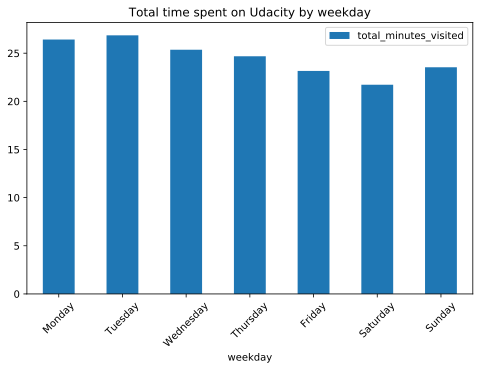

In [0]:
week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_engagement.loc[week_order].plot(kind = 'bar', rot = 45, title = 'Total time spent on Udacity by weekday')

In [0]:
# pandasql code
def example3_pandasql(enrollments, daily_engagements):
    join_query = '''
        SELECT 
            avg(avg_acct_total_minutes) as avg_total_minutes, 
            status
        FROM
            (SELECT 
                avg(total_minutes_visited) as avg_acct_total_minutes, 
                status, 
                account_key
            FROM
                (SELECT 
                    e.account_key, 
                    e.status,
                    de.total_minutes_visited,
                    (cast(strftime('%s',de.utc_date) as interger) - cast(strftime('%s',e.join_date) as interger))/(24*60*60) as days_since_joining,
                    (cast(strftime('%s',e.cancel_date) as interger) - cast(strftime('%s', de.utc_date) as interger))/(24*60*60) as days_before_cancel
                FROM enrollments as e JOIN daily_engagements as de ON (e.account_key = de.acct)
                WHERE (is_udacity = 0) AND (days_since_joining < 7) AND (days_since_joining >= 0)
                    AND ((days_before_cancel >= 0) OR (status = 'current'))
                )
            GROUP BY status, account_key)
        GROUP BY status
    '''
    return ps.sqldf(join_query, locals()).set_index('status')

# pandas code
def example3_pandas(enrollments, daily_engagements):
    join_df = pd.merge(daily_engagements, 
                   enrollments[enrollments.is_udacity == 0], 
                   how = 'inner', 
                   right_on ='account_key', 
                   left_on = 'acct')
    join_df = join_df[['account_key', 'status', 'total_minutes_visited', 'utc_date', 'join_date', 'cancel_date']]

    join_df['days_since_joining'] = map(lambda x: x.days, 
                                        pd.to_datetime(join_df.utc_date) - pd.to_datetime(join_df.join_date))

    join_df['before_cancel'] = (pd.to_datetime(join_df.utc_date) <= pd.to_datetime(join_df.cancel_date))
    join_df = join_df[join_df.before_cancel | (join_df.status == 'current')]

    join_df = join_df[(join_df.days_since_joining < 7) & (join_df.days_since_joining >= 0)]
    avg_account_total_minutes = pd.DataFrame(join_df.groupby(['account_key', 'status'], as_index = False)
                                                     .total_minutes_visited.mean())
    avg_total_minutes= pd.DataFrame(avg_account_total_minutes.groupby('status').total_minutes_visited.mean())
    avg_total_minutes.columns = ['avg_total_minutes']
    return avg_total_minutes

In [0]:
example3_pandasql(enrollments, daily_engagements)


,avg_total_minutes
status,
canceled,30.884667
current,47.307307


In [0]:

example3_pandas(enrollments, daily_engagements)

TypeError: ignored

In [0]:
import time

def count_mean_time(func, params, N =5):
    total_time = 0
    for i in range(N):
        time1 = time.time()
        if len(params) == 1:
            tmp_df = func(params[0])
        elif len(params) == 2:
            tmp_df = func(params[0], params[1])
        time2 = time.time()
        total_time += (time2 - time1)
    return total_time/N

In [0]:
ex1_times = []
for count in range(1000, 137000, 1000):
    pandasql_time = count_mean_time(example1_pandasql, [daily_engagements[:count]])
    pandas_time = count_mean_time(example1_pandas, [daily_engagements[:count]])
    ex1_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})
    print(count)

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
41000
42000
43000
44000
45000
46000
47000
48000
49000
50000
51000
52000
53000
54000
55000
56000
57000
58000
59000
60000
61000
62000
63000
64000
65000
66000
67000
68000
69000
70000
71000
72000
73000
74000
75000
76000
77000
78000
79000
80000
81000
82000
83000
84000
85000
86000
87000
88000
89000
90000
91000
92000
93000
94000
95000
96000
97000
98000
99000
100000
101000
102000
103000
104000
105000
106000
107000
108000
109000
110000
111000
112000
113000
114000
115000
116000
117000
118000
119000
120000
121000
122000
123000
124000
125000
126000
127000
128000
129000
130000
131000
132000
133000
134000
135000
136000


In [0]:
ex1_times_df = pd.DataFrame(ex1_times)
ex1_times_df.columns = ['number of rows in daily_engagements', 'pandas time', 'pandasql time']
ex1_times_df = ex1_times_df.set_index('number of rows in daily_engagements')

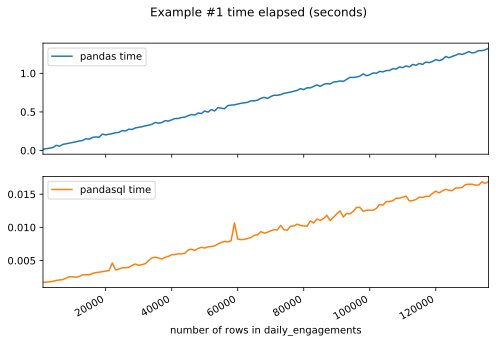

In [0]:
ax = ex1_times_df.plot(title = 'Example #1 time elapsed (seconds)', subplots = True)

In [0]:
all_users = enrollments.account_key.unique().tolist()
len(all_users)

1302

In [0]:
#ex3_times = []
#for users_count in range(10, 1310, 10):
#    users = all_users[:users_count]
#    enrollments_sample = enrollments[enrollments.account_key.isin(users)]
#    daily_engagements_sample = daily_engagements[daily_engagements.acct.isin(users)]
#    count = daily_engagements_sample.shape[0]
#    pandasql_time = count_mean_time(example3_pandasql, [enrollments_sample, daily_engagements_sample])
#    pandas_time = count_mean_time(example3_pandas, [enrollments_sample, daily_engagements_sample])
#    ex3_times.append({'count': count, 'pandasql_time': pandasql_time, 'pandas_time': pandas_time})

#    ex3_times_df = pd.DataFrame(ex3_times).set_index('count')

    
#ax = ex3_times_df.plot(title = 'Example #3 time elapsed')
#ax.set_xlabel('number of rows in daily_engagements')
#ax.set_ylabel('time, seconds')